<a href="https://colab.research.google.com/github/devsTudu/RyzenTech_task1/blob/main/RyzenTechTask%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data Loading

In [46]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'fifa-21-messy-raw-dataset-for-cleaning-exploring:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F923113%2F1579237%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240605%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240605T092448Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D2d7ea72d6c72b94d14a04bdde285d6448f78e2a0af860aa95606bba5c97d844d8f97a6f93843747fa3d9916dd0ab26b5da31797f284e6befebe3e85df179b6f7b2ecc6c334502261ff667b2bc57d018f49d0d2b84457cbb6f4ba16f2e58152c90bd5c97025b414ed12bc6009518ce6a4d3d6f24938dc056a650d2d3ef5aa962c1790530c0f553fc23cbd4fcf9f27bfbb63f6a0cd5bf9342b418061fcdb412be299cd78b62b0e0b9b40c063ef15f33abec0ceff393f9f783b1f6605647f8f01b63e20ed03a78247166aa2aebdf329868cdd2ca2fdcd281600874c68f5c26d24eddc5f4ac92d520f4728e425c8956eac77cb339f973885802973b57d8178e12410'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 5531474 bytes downloaded
Downloaded and uncompressed: fifa-21-messy-raw-dataset-for-cleaning-exploring
Data source import complete.


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot

In [48]:
data=pd.read_csv('/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   photoUrl          18979 non-null  object
 1   LongName          18979 non-null  object
 2   playerUrl         18979 non-null  object
 3   Nationality       18979 non-null  object
 4   Positions         18979 non-null  object
 5   Name              18979 non-null  object
 6   Age               18979 non-null  int64 
 7   ↓OVA              18979 non-null  int64 
 8   POT               18979 non-null  int64 
 9   Team & Contract   18979 non-null  object
 10  ID                18979 non-null  int64 
 11  Height            18979 non-null  object
 12  Weight            18979 non-null  object
 13  foot              18979 non-null  object
 14  BOV               18979 non-null  int64 
 15  BP                18979 non-null  object
 16  Growth            18979 non-null  int64 
 17  Joined      

<ipython-input-48-52bb88ba48d9>:1: DtypeWarning: Columns (76) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('/kaggle/input/fifa-21-messy-raw-dataset-for-cleaning-exploring/fifa21_raw_data.csv')


In [49]:
pd.set_option('display.max_columns',10)
pd.set_option('display.max_rows',10)
data.select_dtypes(include='object').head()


,photoUrl,LongName,playerUrl,Nationality,Positions,...,SM,A/W,D/W,IR,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,...,4★,Medium,Low,5 ★,\n372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,...,5★,High,Low,5 ★,\n344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,...,1★,Medium,Medium,3 ★,\n86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,...,4★,High,High,4 ★,\n163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,...,5★,High,Medium,5 ★,\n273


###Standardizing Height and Weights

In [50]:
def standardize_height(height):
    if height[-2:] == "cm":
        # Remove "cm" and convert to inches
        return float(height[:-2]) / 2.54
    elif height.find("'")>0:
        # Remove "in" and return as inches
        ft, inch = height.split("'")
        return int(ft) * 12 + int(inch.replace('"', ''))
    else:
        try:
          return int(height)
        # Raise an error if the units are not recognized
        except:
          raise ValueError("Unrecognized height unit:", height)

# Apply the function to the "Height" column
data["Height"] = data["Height"].apply(standardize_height)

In [51]:
def standardize_weight(weight):
    if weight[-2:] == "kg":
        # Remove "kg" and convert to lbs
        return float(weight[:-2]) * 2.2046
    elif weight[-3:]== "lbs":
        # Remove "lbs" and return as lbs
        return float(weight[:-3])
    else:
        try:
          return int(weight)
        # Raise an error if the units are not recognized
        except:
          raise ValueError("Unrecognized weights unit:", weight)

data.Weight = data.Weight.apply(standardize_weight)

###Cleaning the values and making data uniform

In [52]:
#2. Remove the unnecessary newline characters from all columns that have them.
for column in data.select_dtypes(include=[object]):
    data[column] = data[column].str.replace('\n', '', regex=False)

In [53]:
#3. Based on the 'Joined' column, check which players have been playing at a club for more than 10 years!
data.Joined.info()

<class 'pandas.core.series.Series'>
RangeIndex: 18979 entries, 0 to 18978
Series name: Joined
Non-Null Count  Dtype 
--------------  ----- 
18979 non-null  object
dtypes: object(1)
memory usage: 148.4+ KB


In [54]:
data['Joined'] = pd.to_datetime(data['Joined'])
data["Yearstayed"] = (data.Joined - pd.to_datetime('today')).dt.days / -365
data[data['Yearstayed'] > 10].Name.drop_duplicates().sort_values()


14569        A. Ablet
8823        A. Acosta
1212         A. Ademi
1579     A. Aguilmera
16015    A. Al Aryani
             ...     
4844      Zheng Zheng
6688        Zheng Zhi
15285    Zhong Jinbao
9721         Zhou Yun
888           �. Radu
Name: Name, Length: 826, dtype: object

In [55]:
# 'Value', 'Wage' and "Release Clause' are string columns. Convert them to numbers. For eg, "M" in value column is Million, so multiply the row values by 1,000,000, etc.
data[['Value', 'Wage', "Release Clause"]]
def convert_to_euro(val):
  val = val[1:]
  val = val.replace('M',"*1000000")
  val = val.replace('K',"*1000")
  return eval(val)

for i in ['Value', 'Wage', "Release Clause"]:
  data[i] = data[i].apply(convert_to_euro)
data[['Value', 'Wage', "Release Clause"]]


,Value,Wage,Release Clause
0,67500000.0,560000,138400000.0
1,46000000.0,220000,75900000.0
2,75000000.0,125000,159400000.0
3,87000000.0,370000,161000000.0
4,90000000.0,270000,166500000.0
...,...,...,...
18974,35000.0,1000,57000.0
18975,60000.0,500,165000.0
18976,40000.0,1000,70000.0
18977,60000.0,500,165000.0


In [56]:
# Some columns have 'star' characters. Strip those columns of these stars and make the columns numerical
col_list = []
for col in data.columns:
  try :
    if data[col].str.contains('★').any():
      col_list.append(col)
  except: pass

for i in col_list:
  data[i] = data[i].str.replace("★","").str.strip().astype(int)
data[col_list]


,W/F,SM,IR
0,4,4,5
1,4,5,5
2,3,1,3
3,5,4,4
4,5,5,5
...,...,...,...
18974,2,2,1
18975,2,2,1
18976,2,2,1
18977,2,2,1


In [57]:
data.select_dtypes(include='object').head()

,photoUrl,LongName,playerUrl,Nationality,Positions,...,BP,Loan Date End,A/W,D/W,Hits
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,...,RW,NaN,Medium,Low,372
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,...,ST,NaN,High,Low,344
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,...,GK,NaN,Medium,Medium,86
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,...,CAM,NaN,High,High,163
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,...,LW,NaN,High,Medium,273


In [58]:
# prompt: columnwise count the null values
x = data.isnull().sum()
x[x>0]


Loan Date End    17966
Hits              2595
dtype: int64

In [59]:
data["Hits"].fillna(0,inplace=True)
def calculate_hits(val):
  val = str(val)
  val = val.replace('M',"*1000000")
  val = val.replace('K',"*1000")
  return eval(val)
data["Hits"] = data["Hits"].apply(calculate_hits)


In [60]:
data.columns.sort_values()

Index(['A/W', 'Acceleration', 'Age', 'Aggression', 'Agility', 'Attacking',
       'BOV', 'BP', 'Balance', 'Ball Control', 'Base Stats', 'Composure',
       'Crossing', 'Curve', 'D/W', 'DEF', 'DRI', 'Defending', 'Dribbling',
       'FK Accuracy', 'Finishing', 'GK Diving', 'GK Handling', 'GK Kicking',
       'GK Positioning', 'GK Reflexes', 'Goalkeeping', 'Growth',
       'Heading Accuracy', 'Height', 'Hits', 'ID', 'IR', 'Interceptions',
       'Joined', 'Jumping', 'Loan Date End', 'Long Passing', 'Long Shots',
       'LongName', 'Marking', 'Mentality', 'Movement', 'Name', 'Nationality',
       'PAC', 'PAS', 'PHY', 'POT', 'Penalties', 'Positioning', 'Positions',
       'Power', 'Reactions', 'Release Clause', 'SHO', 'SM', 'Short Passing',
       'Shot Power', 'Skill', 'Sliding Tackle', 'Sprint Speed', 'Stamina',
       'Standing Tackle', 'Strength', 'Team & Contract', 'Total Stats',
       'Value', 'Vision', 'Volleys', 'W/F', 'Wage', 'Weight', 'Yearstayed',
       'foot', 'photoUrl', 'pla

In [61]:
len("2004 ~ 2021")

11

In [62]:
# prompt: convert the datatype to date time

data['Joined'] = data['Joined'].astype('datetime64[ns]')


In [63]:
data["Contract"] = data["Team & Contract"].apply(lambda x: x[-11:])

In [64]:
# prompt: split the contract columnt into contract start and contract end

data[['Contract Start', 'Contract End']] = data['Contract'].str.split(' ~ ', expand=True)
data.drop('Contract', axis=1, inplace=True)


In [65]:
data.columns.sort_values()

Index(['A/W', 'Acceleration', 'Age', 'Aggression', 'Agility', 'Attacking',
       'BOV', 'BP', 'Balance', 'Ball Control', 'Base Stats', 'Composure',
       'Contract End', 'Contract Start', 'Crossing', 'Curve', 'D/W', 'DEF',
       'DRI', 'Defending', 'Dribbling', 'FK Accuracy', 'Finishing',
       'GK Diving', 'GK Handling', 'GK Kicking', 'GK Positioning',
       'GK Reflexes', 'Goalkeeping', 'Growth', 'Heading Accuracy', 'Height',
       'Hits', 'ID', 'IR', 'Interceptions', 'Joined', 'Jumping',
       'Loan Date End', 'Long Passing', 'Long Shots', 'LongName', 'Marking',
       'Mentality', 'Movement', 'Name', 'Nationality', 'PAC', 'PAS', 'PHY',
       'POT', 'Penalties', 'Positioning', 'Positions', 'Power', 'Reactions',
       'Release Clause', 'SHO', 'SM', 'Short Passing', 'Shot Power', 'Skill',
       'Sliding Tackle', 'Sprint Speed', 'Stamina', 'Standing Tackle',
       'Strength', 'Team & Contract', 'Total Stats', 'Value', 'Vision',
       'Volleys', 'W/F', 'Wage', 'Weight', 'Yea

In [66]:
data["Contract_starts_with_Loan"] = data["Contract Start"].str.contains("On Loan")
data['Contract Start'] = data['Contract Start'].str.replace("On Loan","")


In [76]:
#Removing the contracts those were free
data = data[~data['Contract Start'].str.contains('Free')]

In [97]:
y = data["Contract Start"]
y = y.astype(int)
y[(y<200)] += 2000

In [102]:
data["Contract Start"] = y
data["Contract Start"].describe()

count    18741.000000
mean      2018.465930
std          2.117714
min       1998.000000
25%       2018.000000
50%       2019.000000
75%       2020.000000
max       2023.000000
Name: Contract Start, dtype: float64

In [103]:
data['Contract Start'] = pd.to_datetime(data['Contract Start'],format="mixed")
data['Contract End'] = pd.to_datetime(data['Contract End'])
data[['Contract Start', 'Contract End']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18978
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Contract Start  18741 non-null  datetime64[ns]
 1   Contract End    17728 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 955.3 KB


In [104]:
# prompt: show the variables with object data type
data.select_dtypes(include='object').head()


,photoUrl,LongName,playerUrl,Nationality,Positions,...,foot,BP,Loan Date End,A/W,D/W
0,https://cdn.sofifa.com/players/158/023/21_60.png,Lionel Messi,http://sofifa.com/player/158023/lionel-messi/2...,Argentina,RW ST CF,...,Left,RW,NaN,Medium,Low
1,https://cdn.sofifa.com/players/020/801/21_60.png,C. Ronaldo dos Santos Aveiro,http://sofifa.com/player/20801/c-ronaldo-dos-s...,Portugal,ST LW,...,Right,ST,NaN,High,Low
2,https://cdn.sofifa.com/players/200/389/21_60.png,Jan Oblak,http://sofifa.com/player/200389/jan-oblak/210005/,Slovenia,GK,...,Right,GK,NaN,Medium,Medium
3,https://cdn.sofifa.com/players/192/985/21_60.png,Kevin De Bruyne,http://sofifa.com/player/192985/kevin-de-bruyn...,Belgium,CAM CM,...,Right,CAM,NaN,High,High
4,https://cdn.sofifa.com/players/190/871/21_60.png,Neymar da Silva Santos Jr.,http://sofifa.com/player/190871/neymar-da-silv...,Brazil,LW CAM,...,Right,LW,NaN,High,Medium


###Building a Graph compare wage with player value

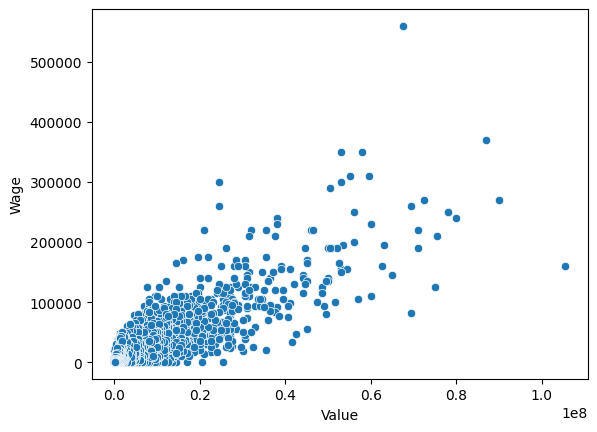

In [105]:
#Which players are highly valuable but still underpaid (on low wages)? (hint: scatter plot between wage and value)

sns.scatterplot(x="Value", y="Wage", data=data)
plt.show()


In [ ]:
# prompt: export the df to csv

data.to_csv("cleaned_fifa_data.csv", index=False)


###Building Model


In [110]:
# prompt: Spliting the columns according to the a separator present in value
y = data['Positions'].str.split(' ', expand=True)
y

,0,1,2
0,RW,ST,CF
1,ST,LW,None
2,GK,None,None
3,CAM,CM,None
4,LW,CAM,None
...,...,...,...
18974,CB,None,None
18975,ST,None,None
18976,CB,None,None
18977,CM,None,None


In [111]:
df = data['Positions'].str.split(' ', expand=True)
y = pd.concat([df[0],df[1],df[2]],axis=0).unique()
y

array(['RW', 'ST', 'GK', 'CAM', 'LW', 'CB', 'CDM', 'CF', 'CM', 'RM', 'RB',
       'LB', 'LM', 'RWB', 'LWB', None], dtype=object)

In [ ]:
i = "RW"
data["Positions"].str.contains(i)

In [114]:
data.select_dtypes(include='object').columns

Index(['photoUrl', 'LongName', 'playerUrl', 'Nationality', 'Positions', 'Name',
       'Team & Contract', 'foot', 'BP', 'Loan Date End', 'A/W', 'D/W'],
      dtype='object')

In [115]:
# Manually One-Hot Encoding
x = pd.DataFrame()
for i in y:
  if i is not None:
    x[i+"_Pos"] = (data["Positions"].str.contains(i)).astype(int)+ (data['BP'].str.contains(i)).astype(int)
x.head()

,RW_Pos,ST_Pos,GK_Pos,CAM_Pos,LW_Pos,...,RB_Pos,LB_Pos,LM_Pos,RWB_Pos,LWB_Pos
0,2,1,0,0,0,...,0,0,0,0,0
1,0,2,0,0,1,...,0,0,0,0,0
2,0,0,2,0,0,...,0,0,0,0,0
3,0,0,0,2,0,...,0,0,0,0,0
4,0,0,0,1,2,...,0,0,0,0,0


In [119]:
# prompt: drop column position
data = data.drop(columns=['Positions','BP'])
data = pd.concat([data,x],axis=1)

In [131]:
data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18978
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   photoUrl       18741 non-null  object
 1   LongName       18741 non-null  object
 2   playerUrl      18741 non-null  object
 3   Nationality    18741 non-null  object
 4   Name           18741 non-null  object
 5   foot           18741 non-null  object
 6   Loan Date End  1013 non-null   object
 7   A/W            18741 non-null  object
 8   D/W            18741 non-null  object
 9   Team           18741 non-null  object
dtypes: object(10)
memory usage: 2.1+ MB


In [128]:
data['Team'] = data['Team & Contract'].apply(lambda a : str(a)[:-11])
data.drop('Team & Contract',axis=1,inplace=True)

In [137]:
#data[col_to_encode].nunique()
#data["A/W"].unique()
#data["D/W"].unique()
def category_to_value(col):
  if "High" == col : return 3
  elif "Medium" == col : return 2
  else : return 1
data['A/W'] = data['A/W'].apply(category_to_value)
data['D/W'] = data['D/W'].apply(category_to_value)


In [138]:
col_to_encode = ['Nationality','Team','foot']
one_hot_encoded_data = pd.get_dummies(data, columns = col_to_encode,dtype=np.uint8)
one_hot_encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18978
Columns: 1397 entries, photoUrl to foot_Right
dtypes: bool(1), datetime64[ns](3), float64(5), int64(77), object(5), uint8(1306)
memory usage: 36.9+ MB


In [140]:
one_hot_encoded_data.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18978
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   photoUrl       18741 non-null  object
 1   LongName       18741 non-null  object
 2   playerUrl      18741 non-null  object
 3   Name           18741 non-null  object
 4   Loan Date End  1013 non-null   object
dtypes: object(5)
memory usage: 1.4+ MB


In [143]:
data.select_dtypes(include='int').info()

<class 'pandas.core.frame.DataFrame'>
Index: 18741 entries, 0 to 18978
Data columns (total 77 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               18741 non-null  int64
 1   ↓OVA              18741 non-null  int64
 2   POT               18741 non-null  int64
 3   ID                18741 non-null  int64
 4   Height            18741 non-null  int64
 5   BOV               18741 non-null  int64
 6   Growth            18741 non-null  int64
 7   Wage              18741 non-null  int64
 8   Attacking         18741 non-null  int64
 9   Crossing          18741 non-null  int64
 10  Finishing         18741 non-null  int64
 11  Heading Accuracy  18741 non-null  int64
 12  Short Passing     18741 non-null  int64
 13  Volleys           18741 non-null  int64
 14  Skill             18741 non-null  int64
 15  Dribbling         18741 non-null  int64
 16  Curve             18741 non-null  int64
 17  FK Accuracy       18741 non-null  in

###Training Model

In [144]:
model_data = one_hot_encoded_data.select_dtypes(exclude='object')

In [148]:
def convert_dtypes(data,prev_type,new_type):
  cols = model_data.select_dtypes(include=prev_type).columns
  data[cols] = data.select_dtypes(include=prev_type).astype(new_type)
  return data
#To reduce the size of data
model_data = convert_dtypes(model_data,'bool','uint8')

In [149]:
#model_data.info()
model_data = model_data.select_dtypes(exclude='datetime64')

In [150]:
# prompt: regression with the value as dependent variable

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = model_data.drop(['Value',"ID"], axis=1)
y = model_data['Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

#print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error:', mean_squared_error(y_test, y_pred))
print('R squared score:', r2_score(y_test, y_pred))


Intercept: -447470.9925737926
Mean squared error: 472626651989.79755
R squared score: 0.9818287189291385


In [151]:
pd.DataFrame(data={"Var":X.columns,"Coeff":model.coef_})

,Var,Coeff
0,Age,-2.139590e+04
1,↓OVA,6.855643e+09
2,POT,-6.855606e+09
3,Height,-7.434142e+03
4,Weight,5.834439e+02
...,...,...
1382,"Team_Örebro SKJun 30, 2",-1.812311e+06
1383,Team_Östersunds FK,1.585250e+05
1384,Team_Śląsk Wrocław,1.025307e+05
1385,foot_Left,-7.497238e+03
